<a href="https://colab.research.google.com/github/alpacarlioglu/FNN-From-Scratch/blob/main/FNN_FromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([[800, 1],
              [1000, 2],
              [1200, 2],
              [1500, 3],
              [1800, 3],
              [2000, 4],
              [2500, 4],
              [3000, 5]
              ])

y = np.array([[150],
              [200],
              [250],
              [300],
              [350],
              [400],
              [500],
              [600]
              ])

In [ ]:
print(X.shape, X.T.shape)

(8, 2) (2, 8)


In [ ]:
class StandardScaler:
  def __init__(self):
    self.mean = None
    self.std_dev = None

  def fit(self, X):
    self.mean = np.mean(X, axis=0)
    self.std_dev = np.std(X, axis=0)

  def transform(self, X):
    return (X - self.mean) / self.std_dev

  def fit_transform(self, X):
    self.fit(X)
    return self.transform(X)

  def inverse_transform(self, X):
    return (X * self.std_dev) + self.mean

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, learning_rate=0.001) -> None:
        """Initialize neural network parameters"""
        self.learning_rate = learning_rate

        # He Initialization
        self.weights_input = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, 1) * np.sqrt(2 / hidden_size)
        self.bias_output = np.zeros((1, 1))

        # Add tracking of best weights and minimum loss
        self.best_weights = {
            'weights_input': None,
            'bias_hidden': None,
            'weights_hidden_output': None,
            'bias_output': None
        }
        self.min_loss = float('inf')

    def relu(self, x):
        return np.maximum(0, x)

    def derivative_relu(self, x):
        return np.where(x > 0, 1, 0)

    def forward_pass(self, X):
        self.hidden_input = np.dot(X, self.weights_input) + self.bias_hidden
        self.hidden_output = self.relu(self.hidden_input)

        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = self.output_input  # Linear activation for regression

        return self.final_output

    def backward_pass(self, X, y):
        m = X.shape[0]
        error = y - self.final_output

        # Output layer gradients
        d_output = error  # Derivative of MSE with respect to output

        # Hidden layer gradients
        error_hidden = np.dot(d_output, self.weights_hidden_output.T)
        d_hidden = error_hidden * self.derivative_relu(self.hidden_output)

        # Update weights and biases with gradient clipping
        clip_value = 1.0  # Prevent exploding gradients

        # Output layer updates
        weight_update_output = np.clip(np.dot(self.hidden_output.T, d_output), -clip_value, clip_value)
        self.weights_hidden_output += (weight_update_output * self.learning_rate) / m
        self.bias_output += np.mean(d_output, axis=0, keepdims=True) * self.learning_rate

        # Hidden layer updates
        weight_update_hidden = np.clip(np.dot(X.T, d_hidden), -clip_value, clip_value)
        self.weights_input += (weight_update_hidden * self.learning_rate) / m
        self.bias_hidden += np.mean(d_hidden, axis=0, keepdims=True) * self.learning_rate

        return np.mean(np.square(error))

    def train(self, X, y, epochs=10000, early_stopping_patience=1000):
        losses = []
        patience_counter = 0

        for epoch in range(epochs):
            # Forward pass
            self.forward_pass(X)

            # Backward pass
            loss = self.backward_pass(X, y)

            # Save best weights
            if loss < self.min_loss:
                self.min_loss = loss
                self.best_weights = {
                    'weights_input': self.weights_input.copy(),
                    'bias_hidden': self.bias_hidden.copy(),
                    'weights_hidden_output': self.weights_hidden_output.copy(),
                    'bias_output': self.bias_output.copy()
                }
                patience_counter = 0
            else:
                patience_counter += 1

            # Early stopping
            if patience_counter >= early_stopping_patience:
                print(f"Early stopping at epoch {epoch}")
                break

            if epoch % 1000 == 0:
                losses.append(loss)
                print(f"Epoch: {epoch}, Loss: {loss:.6f}")

        # Restore best weights
        self.weights_input = self.best_weights['weights_input']
        self.bias_hidden = self.best_weights['bias_hidden']
        self.weights_hidden_output = self.best_weights['weights_hidden_output']
        self.bias_output = self.best_weights['bias_output']

        return losses

Prediction

In [ ]:
# Prepare the data
scaler_X = StandardScaler()
normalized_X = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
normalized_y = scaler_y.fit_transform(y)

# Create and train the model
nn = NeuralNetwork(input_size=2, hidden_size=4, learning_rate=0.001)
losses = nn.train(normalized_X, normalized_y, epochs=10000, early_stopping_patience=1000)

# Make predictions
new_X = np.array([[1340, 2], [780, 1]])
new_x_norm = scaler_X.transform(new_X)
pred_norm = nn.forward_pass(new_x_norm)
pred = scaler_y.inverse_transform(pred_norm)
print(f"Predicted Prices: {pred.round()}")

Epoch: 0, Loss: 1.839294
Epoch: 1000, Loss: 0.833574
Epoch: 2000, Loss: 0.451969
Epoch: 3000, Loss: 0.320295
Epoch: 4000, Loss: 0.265625
Epoch: 5000, Loss: 0.226691
Epoch: 6000, Loss: 0.183985
Epoch: 7000, Loss: 0.138651
Epoch: 8000, Loss: 0.098740
Epoch: 9000, Loss: 0.069544
Predicted Prices: [[  11.]
 [-363.]]


Epoch 0, Loss: 0.999795
Epoch 500, Loss: 0.611502
Epoch 1000, Loss: 0.024409
Epoch 1500, Loss: 0.018126
Epoch 2000, Loss: 0.014039
Epoch 2500, Loss: 0.011203
Epoch 3000, Loss: 0.009162
Epoch 3500, Loss: 0.007669
Epoch 4000, Loss: 0.006566
Epoch 4500, Loss: 0.005740


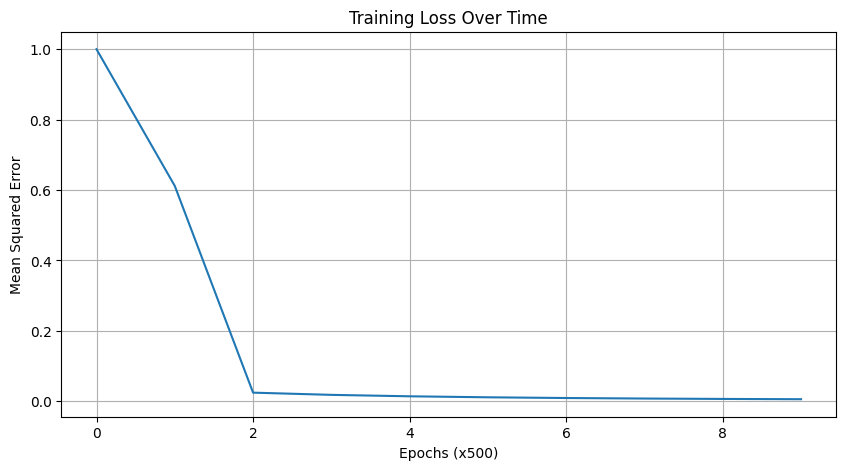


Predictions:
Input: Square feet=1340, Bedrooms=2 -> Predicted Price: $244.70
Input: Square feet=780, Bedrooms=1 -> Predicted Price: $149.36


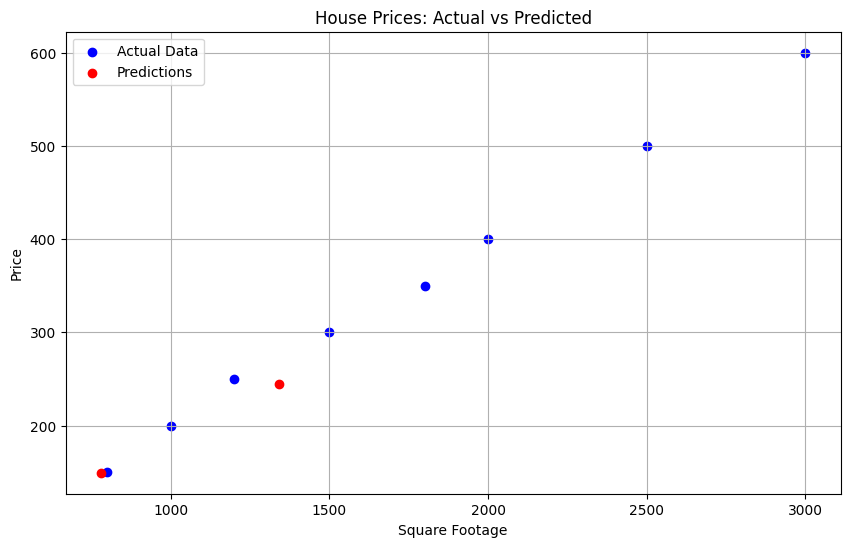

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, learning_rate=0.01):
        self.learning_rate = learning_rate

        # Adjusted initialization for better starting points
        self.weights_input = np.random.randn(input_size, hidden_size) * 0.01
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, 1) * 0.01
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, 1))

        self.best_weights = None
        self.min_loss = float('inf')

    def relu(self, x):
        return np.maximum(0, x)

    def derivative_relu(self, x):
        return np.where(x > 0, 1, 0)

    def forward_pass(self, X):
        self.hidden_input = np.dot(X, self.weights_input) + self.bias_hidden
        self.hidden_output = self.relu(self.hidden_input)

        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = self.final_input

        return self.final_output

    def backward_pass(self, X, y):
        m = X.shape[0]

        # Compute gradients
        error = y - self.final_output

        # Output layer gradients
        d_weights_output = np.dot(self.hidden_output.T, error)
        d_bias_output = np.sum(error, axis=0, keepdims=True)

        # Hidden layer gradients
        d_hidden = np.dot(error, self.weights_hidden_output.T)
        d_hidden = d_hidden * self.derivative_relu(self.hidden_output)

        d_weights_hidden = np.dot(X.T, d_hidden)
        d_bias_hidden = np.sum(d_hidden, axis=0, keepdims=True)

        # Update weights with normalization
        self.weights_hidden_output += (d_weights_output / m) * self.learning_rate
        self.bias_output += (d_bias_output / m) * self.learning_rate

        self.weights_input += (d_weights_hidden / m) * self.learning_rate
        self.bias_hidden += (d_bias_hidden / m) * self.learning_rate

        return np.mean(np.square(error))

    def train(self, X, y, epochs=5000, batch_size=None):
        losses = []

        for epoch in range(epochs):
            # Forward pass
            predictions = self.forward_pass(X)

            # Backward pass
            loss = self.backward_pass(X, y)

            # Store best weights
            if loss < self.min_loss:
                self.min_loss = loss
                self.best_weights = {
                    'weights_input': self.weights_input.copy(),
                    'bias_hidden': self.bias_hidden.copy(),
                    'weights_hidden_output': self.weights_hidden_output.copy(),
                    'bias_output': self.bias_output.copy()
                }

            if epoch % 500 == 0:
                losses.append(loss)
                print(f"Epoch {epoch}, Loss: {loss:.6f}")

        # Restore best weights
        if self.best_weights is not None:
            self.weights_input = self.best_weights['weights_input']
            self.bias_hidden = self.best_weights['bias_hidden']
            self.weights_hidden_output = self.best_weights['weights_hidden_output']
            self.bias_output = self.best_weights['bias_output']

        return losses

# Prepare the data
X = np.array([
    [800, 1], [1000, 2], [1200, 2], [1500, 3],
    [1800, 3], [2000, 4], [2500, 4], [3000, 5]
])
y = np.array([[150], [200], [250], [300], [350], [400], [500], [600]])

# Scale the data
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Create and train the model
model = NeuralNetwork(input_size=2, hidden_size=8, learning_rate=0.01)
losses = model.train(X_scaled, y_scaled, epochs=5000)

# Plot training progress
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epochs (x500)')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# Test the model
test_data = np.array([[1340, 2], [780, 1]])
test_scaled = scaler_X.transform(test_data)
pred_scaled = model.forward_pass(test_scaled)
predictions = scaler_y.inverse_transform(pred_scaled)

print("\nPredictions:")
for input_data, pred in zip(test_data, predictions):
    print(f"Input: Square feet={input_data[0]}, Bedrooms={input_data[1]} -> Predicted Price: ${pred[0]:.2f}")

# Visualize the predictions vs actual data for square footage
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, label='Actual Data', color='blue')
plt.scatter(test_data[:, 0], predictions, label='Predictions', color='red')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('House Prices: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()